In [23]:
import pandas as pd 

In [24]:
df = pd.read_csv('cleaned_data_v2.csv')

In [25]:
df

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,yr_built,yr_renovated,zipcode,lat,long,nearest_station_distance_km,bathroom_category,density,commute_time,grade_living
0,221900.0,3,1.00,5650,1.0,0,0,3,1955,0,98178,47.5112,-122.257,8620.002287,Studio or 1 Bathroom,5364.0,32.9,8260
1,538000.0,3,2.25,7242,2.0,0,0,3,1951,1991,98125,47.7210,-122.319,2078.181042,2-3 Bathrooms,7999.0,28.9,17990
2,180000.0,2,1.00,10000,1.0,0,0,3,1933,0,98028,47.7379,-122.233,8109.552186,Studio or 1 Bathroom,3833.0,33.1,4620
3,604000.0,4,3.00,5000,1.0,0,0,5,1965,0,98136,47.5208,-122.393,8918.318639,2-3 Bathrooms,7517.0,30.6,13720
4,510000.0,3,2.00,8080,1.0,0,0,3,1987,0,98074,47.6168,-122.045,19789.800401,1-2 Bathrooms,2896.0,32.7,13440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1131,3.0,0,0,3,2009,0,98103,47.6993,-122.346,1372.516972,2-3 Bathrooms,11391.0,27.1,12240
21609,400000.0,4,2.50,5813,2.0,0,0,3,2014,0,98146,47.5107,-122.362,8505.181320,2-3 Bathrooms,6034.0,29.8,18480
21610,402101.0,2,0.75,1350,2.0,0,0,3,2009,0,98144,47.5944,-122.299,1942.180508,Studio or 1 Bathroom,9389.0,29.3,7140
21611,400000.0,3,2.50,2388,2.0,0,0,3,2004,0,98027,47.5345,-122.069,18943.445917,2-3 Bathrooms,487.0,29.3,12800


In [26]:
df2 = df.drop(columns=['bathroom_category'])
df2

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,yr_built,yr_renovated,zipcode,lat,long,nearest_station_distance_km,density,commute_time,grade_living
0,221900.0,3,1.00,5650,1.0,0,0,3,1955,0,98178,47.5112,-122.257,8620.002287,5364.0,32.9,8260
1,538000.0,3,2.25,7242,2.0,0,0,3,1951,1991,98125,47.7210,-122.319,2078.181042,7999.0,28.9,17990
2,180000.0,2,1.00,10000,1.0,0,0,3,1933,0,98028,47.7379,-122.233,8109.552186,3833.0,33.1,4620
3,604000.0,4,3.00,5000,1.0,0,0,5,1965,0,98136,47.5208,-122.393,8918.318639,7517.0,30.6,13720
4,510000.0,3,2.00,8080,1.0,0,0,3,1987,0,98074,47.6168,-122.045,19789.800401,2896.0,32.7,13440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1131,3.0,0,0,3,2009,0,98103,47.6993,-122.346,1372.516972,11391.0,27.1,12240
21609,400000.0,4,2.50,5813,2.0,0,0,3,2014,0,98146,47.5107,-122.362,8505.181320,6034.0,29.8,18480
21610,402101.0,2,0.75,1350,2.0,0,0,3,2009,0,98144,47.5944,-122.299,1942.180508,9389.0,29.3,7140
21611,400000.0,3,2.50,2388,2.0,0,0,3,2004,0,98027,47.5345,-122.069,18943.445917,487.0,29.3,12800


In [ ]:
# One-hot encode the 'view' column
df2 = pd.get_dummies(df2, columns=['floors','view','condition','zipcode'])

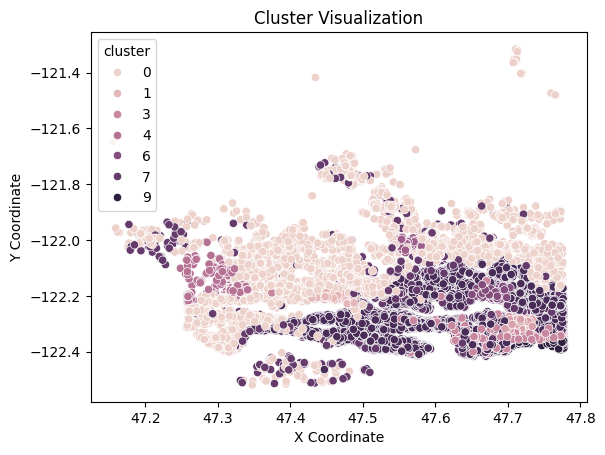

In [34]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Separate features
# Drop the 'price' column
X = df2.drop('price', axis=1)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original DataFrame
df['cluster'] = clusters


# Create a scatter plot
sns.scatterplot(data=df, x='lat', y='long', hue='cluster')

# Add labels and title
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Cluster Visualization')

# Show the plot
plt.show()



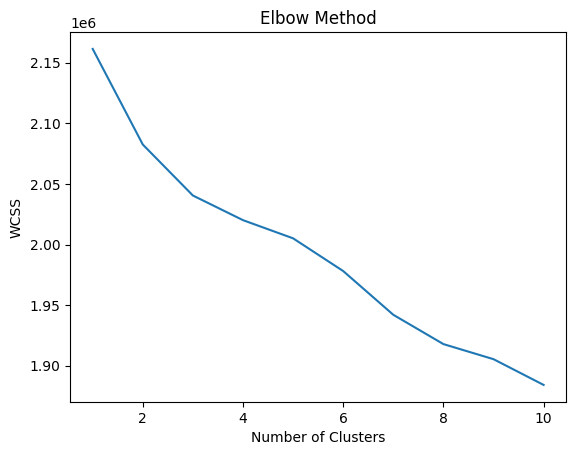

In [36]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Separate features
# Drop the 'price' column
X = df2.drop('price', axis=1)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculate WCSS for different number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


In [35]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
silhouette_avg = silhouette_score(X_scaled, clusters)

# Print the silhouette score
print("The silhouette score is:", silhouette_avg)


The silhouette score is: 0.04422731415344928


For eps=0.1, min_samples=3, silhouette score: -0.5760683240239056
For eps=0.1, min_samples=5, silhouette score: -0.3704678432794971
For eps=0.1, min_samples=7, silhouette score: -0.19846391843297745
For eps=0.3, min_samples=3, silhouette score: -0.3655127415356346
For eps=0.3, min_samples=5, silhouette score: -0.44954454150228174
For eps=0.3, min_samples=7, silhouette score: -0.48237039948421084
For eps=0.5, min_samples=3, silhouette score: -0.0915595198123196
For eps=0.5, min_samples=5, silhouette score: -0.18547636575184143
For eps=0.5, min_samples=7, silhouette score: -0.23861221441415462
Best parameters: {'eps': 0.5, 'min_samples': 3}
Best silhouette score: -0.0915595198123196


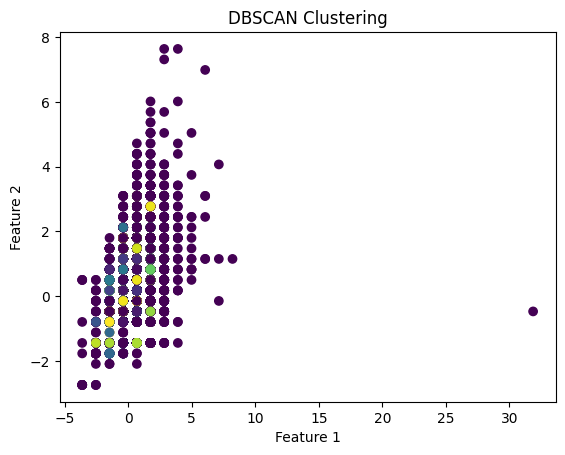

In [45]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Sample DataFrame
# Assuming X_scaled is your scaled data

# Define parameter values to iterate over
eps_values = [0.1, 0.3, 0.5]
min_samples_values = [3, 5, 7]

best_score = -1
best_params = {}

# Perform grid search manually
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(X_scaled)
        silhouette_avg = silhouette_score(X_scaled, clusters)
        print(f"For eps={eps}, min_samples={min_samples}, silhouette score: {silhouette_avg}")
        if silhouette_avg > best_score:
            best_score = silhouette_avg
            best_params = {'eps': eps, 'min_samples': min_samples}

print("Best parameters:", best_params)
print("Best silhouette score:", best_score)

# Fit DBSCAN with the best parameters
best_dbscan = DBSCAN(**best_params)
clusters = best_dbscan.fit_predict(X_scaled)

# Visualize the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering')
plt.show()


In [38]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
silhouette_avg = silhouette_score(X_scaled, clusters)

# Print the silhouette score
print("The silhouette score is:", silhouette_avg)


The silhouette score is: -0.44954454150228174


In [44]:
df2

,price,bedrooms,bathrooms,sqft_lot,waterfront,yr_built,yr_renovated,lat,long,nearest_station_distance_km,density,commute_time,grade_living,floors_1.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,view_0,view_1,view_2,view_3,view_4,condition_1,condition_2,condition_3,condition_4,condition_5,zipcode_98001,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98057,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,zipcode_98952
0,221900.0,3,1.00,5650,0,1955,0,47.5112,-122.257,8620.002287,5364.0,32.9,8260,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1,538000.0,3,2.25,7242,0,1951,1991,47.7210,-122.319,2078.181042,7999.0,28.9,17990,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,180000.0,2,1.00,10000,0,1933,0,47.7379,-122.233,8109.552186,3833.0,33.1,4620,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,604000.0,4,3.00,5000,0,1965,0,47.5208,-122.393,8918.318639,7517.0,30.6,13720,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
4,510000.0,3,2.00,8080,0,1987,0,47.6168,-122.045,19789.800401,2896.0,32.7,13440,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fal

In [43]:

# Set the display options to show all columns
pd.set_option('display.max_columns', None)

# Your code here


In [47]:
# One-hot encode the 'view' column
df3 = pd.get_dummies(df, columns=['floors','view','condition'])

In [50]:
df3.drop(columns=['bathroom_category'], inplace=True)

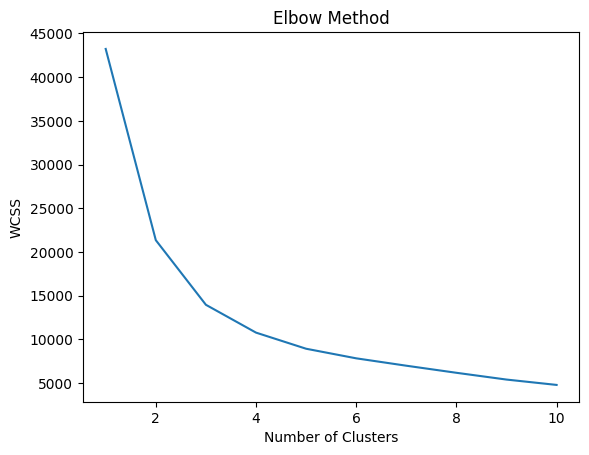

In [72]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Separate features
# Drop the 'price' column
X = df3[['grade_living','price']]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculate WCSS for different number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


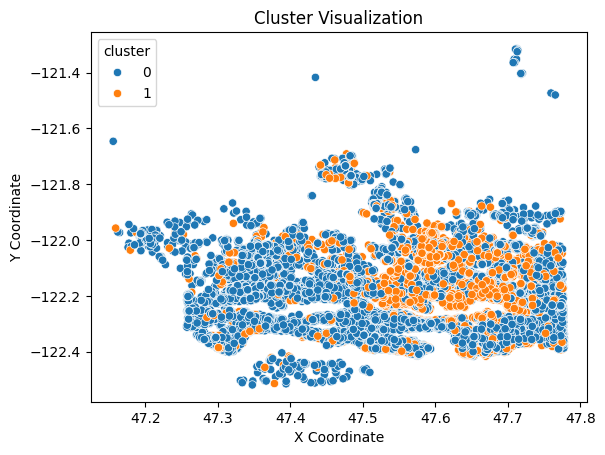

The silhouette score is: 0.6224414522297335


In [77]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Separate features
# Drop the 'price' column
X = df3[['grade_living','price']]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original DataFrame
df['cluster'] = clusters


# Create a scatter plot
sns.scatterplot(data=df, x='lat', y='long', hue='cluster')

# Add labels and title
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Cluster Visualization')

# Show the plot
plt.show()

# Calculate the silhouette score
silhouette_avg = silhouette_score(X_scaled, clusters)

# Print the silhouette score
print("The silhouette score is:", silhouette_avg)



In [79]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Sample DataFrame
# Assuming X_scaled is your scaled data

# Define parameter values to iterate over
eps_values = [1.2,1.3,2,5]
min_samples_values = [3,4,5]

best_score = -1
best_params = {}

# Perform grid search manually
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(X_scaled)
        silhouette_avg = silhouette_score(X_scaled, clusters)
        print(f"For eps={eps}, min_samples={min_samples}, silhouette score: {silhouette_avg}")
        if silhouette_avg > best_score:
            best_score = silhouette_avg
            best_params = {'eps': eps, 'min_samples': min_samples}

print("Best parameters:", best_params)
print("Best silhouette score:", best_score)

# Fit DBSCAN with the best parameters
best_dbscan = DBSCAN(**best_params)
clusters = best_dbscan.fit_predict(X_scaled)




For eps=0.9, min_samples=2, silhouette score: 0.765991768254299
For eps=0.9, min_samples=3, silhouette score: 0.7659076224846921
For eps=0.9, min_samples=4, silhouette score: 0.7669300849727211
For eps=0.9, min_samples=5, silhouette score: 0.8839897038288411
For eps=0.9, min_samples=6, silhouette score: 0.8801835003152582
For eps=1, min_samples=2, silhouette score: 0.8689408300872927
For eps=1, min_samples=3, silhouette score: 0.8688567481476743
For eps=1, min_samples=4, silhouette score: 0.8983141227986988
For eps=1, min_samples=5, silhouette score: 0.8960805496018732
For eps=1, min_samples=6, silhouette score: 0.8801835003152582
For eps=1.1, min_samples=2, silhouette score: 0.8689408300872927
For eps=1.1, min_samples=3, silhouette score: 0.8688567481476743
For eps=1.1, min_samples=4, silhouette score: 0.8983141227986988
For eps=1.1, min_samples=5, silhouette score: 0.8960805496018732
For eps=1.1, min_samples=6, silhouette score: 0.8898516858637382
For eps=1.2, min_samples=2, silhouet

In [83]:
df4['cluster'].unique()

array([ 0, -1])

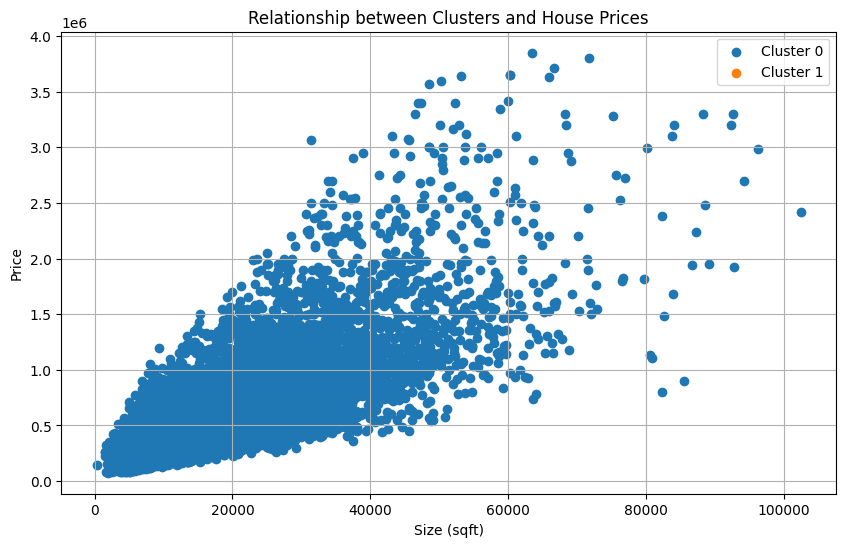

Mean Price for Each Cluster:
cluster
0    4.325379e+05
1    1.119036e+06
Name: price, dtype: float64


In [80]:
df4 = df3
df4['cluster'] = clusters
plt.figure(figsize=(10, 6))
for cluster_label in sorted(df['cluster'].unique()):
    cluster_data = df4[df4['cluster'] == cluster_label]
    plt.scatter(cluster_data['grade_living'], cluster_data['price'], label=f'Cluster {cluster_label}')

plt.xlabel('Size (sqft)')
plt.ylabel('Price')
plt.title('Relationship between Clusters and House Prices')
plt.legend()
plt.grid(True)
plt.show()

# Calculate mean price for each cluster
cluster_means = df.groupby('cluster')['price'].mean()
print("Mean Price for Each Cluster:")
print(cluster_means)

In [85]:
# Number of clusters (excluding noise points, labeled as -1)
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)

# Number of noise points (labeled as -1)
n_noise_points = list(clusters).count(-1)

print("Number of clusters:", n_clusters)
print("Number of noise points:", n_noise_points)

Number of clusters: 1
Number of noise points: 15


In [ ]:
# Visualize the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering')
plt.show()

/Users/onur/.pyenv/versions/3.11.2/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


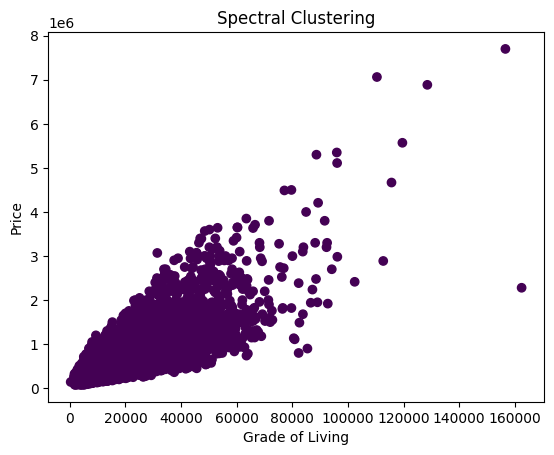

The silhouette score is: -0.43687259188130595


In [86]:
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt

# Separate features
# Drop the 'price' column
X = df3[['grade_living','price']]

# Apply spectral clustering
spectral = SpectralClustering(n_clusters=2, random_state=42)
clusters = spectral.fit_predict(X)

# Add cluster labels to the original DataFrame
df['cluster'] = clusters

# Create a scatter plot
plt.scatter(X['grade_living'], X['price'], c=clusters, cmap='viridis')
plt.xlabel('Grade of Living')
plt.ylabel('Price')
plt.title('Spectral Clustering')
plt.show()

# Calculate the silhouette score
silhouette_avg = silhouette_score(X, clusters)

# Print the silhouette score
print("The silhouette score is:", silhouette_avg)


In [96]:
df5 = df

In [97]:
df5.drop(columns=['bathroom_category'], inplace=True)

KeyError: "['bathroom_category'] not found in axis"

In [98]:
# One-hot encode the 'view' column
df5 = pd.get_dummies(df5, columns=['floors','view','condition','zipcode'])

In [100]:
df5.drop(columns=['cluster'], inplace=True)

In [99]:
df5

,price,bedrooms,bathrooms,sqft_lot,waterfront,yr_built,yr_renovated,lat,long,nearest_station_distance_km,density,commute_time,grade_living,cluster,floors_1.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,view_0,view_1,view_2,view_3,view_4,condition_1,condition_2,condition_3,condition_4,condition_5,zipcode_98001,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98057,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,zipcode_98952
0,221900.0,3,1.00,5650,0,1955,0,47.5112,-122.257,8620.002287,5364.0,32.9,8260,0,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1,538000.0,3,2.25,7242,0,1951,1991,47.7210,-122.319,2078.181042,7999.0,28.9,17990,0,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,180000.0,2,1.00,10000,0,1933,0,47.7379,-122.233,8109.552186,3833.0,33.1,4620,0,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,604000.0,4,3.00,5000,0,1965,0,47.5208,-122.393,8918.318639,7517.0,30.6,13720,0,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
4,510000.0,3,2.00,8080,0,1987,0,47.6168,-122.045,19789.800401,2896.0,32.7,13440,0,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fal

In [102]:
from sklearn.decomposition import PCA

# Separate features
X = df5.drop('price', axis=1)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Create a new DataFrame with the PCA components
df_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

# Add the 'price' column back to the DataFrame
df_pca['price'] = df5['price']

# Print the explained variance ratio
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)


Explained Variance Ratio:
[8.82967409e-01 6.26030065e-02 5.12765380e-02 3.07106927e-03
 8.16704421e-05 3.00903147e-07 3.98119520e-09 3.42454679e-10
 1.80603843e-10 1.40078392e-10 9.12619629e-11 5.36514137e-11
 5.22362956e-11 4.96054138e-11 1.65254506e-11 1.63180690e-11
 1.43494312e-11 1.36546526e-11 1.32078010e-11 1.31774931e-11
 1.28921237e-11 1.24846336e-11 1.21525010e-11 1.18309757e-11
 1.17239916e-11 1.13696452e-11 1.10752360e-11 1.08792860e-11
 1.06993371e-11 1.03330774e-11 1.02169610e-11 1.00422725e-11
 9.93392087e-12 9.63812157e-12 9.39532772e-12 9.18322397e-12
 9.07332085e-12 8.63163055e-12 8.54900852e-12 8.39363714e-12
 8.22171173e-12 7.98345515e-12 7.94024561e-12 7.67792957e-12
 7.54505741e-12 7.43956389e-12 7.29930663e-12 7.11789509e-12
 7.01460583e-12 6.87550829e-12 6.69433588e-12 6.58333094e-12
 6.54183367e-12 6.52065881e-12 6.42896549e-12 6.40859603e-12
 6.36891737e-12 6.26140323e-12 6.19506749e-12 6.14139704e-12
 6.09271815e-12 6.04185330e-12 6.01856539e-12 5.67722667e-1

In [103]:
df_pca.drop(columns=['price'],inplace=True)

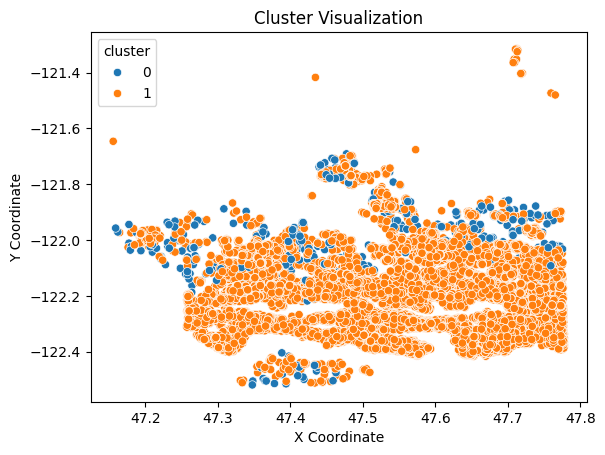

The silhouette score is: 0.9028746691919608


In [124]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Separate features
# Drop the 'price' column
X_first_3_columns = df_pca.iloc[:, :3]

X_scaled = X_first_3_columns

# Apply K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original DataFrame
df['cluster'] = clusters


# Create a scatter plot
sns.scatterplot(data=df, x='lat', y='long', hue='cluster')

# Add labels and title
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Cluster Visualization')

# Show the plot
plt.show()

# Calculate the silhouette score
silhouette_avg = silhouette_score(X_scaled, clusters)

# Print the silhouette score
print("The silhouette score is:", silhouette_avg)



In [109]:
df['cluster'].unique()

array([1, 0], dtype=int32)

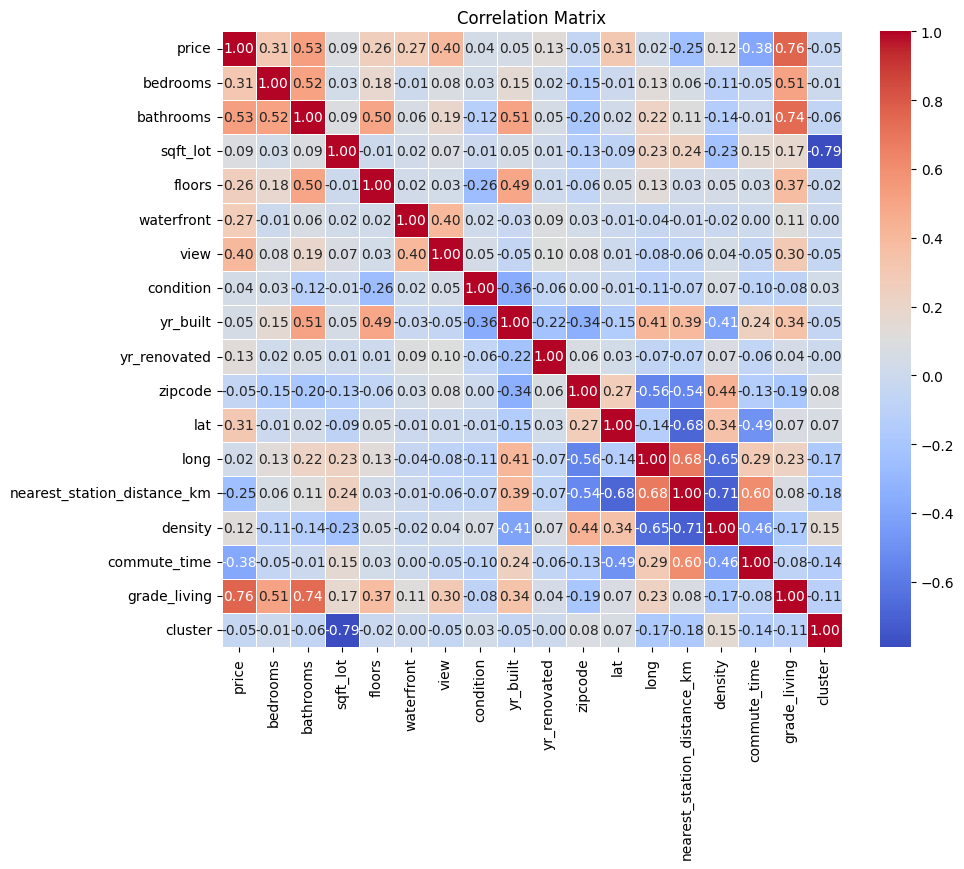

In [127]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [128]:
df['cluster'].value_counts()

cluster
1    21268
0      345
Name: count, dtype: int64

In [113]:
X

,bedrooms,bathrooms,sqft_lot,waterfront,yr_built,yr_renovated,lat,long,nearest_station_distance_km,density,commute_time,grade_living,floors_1.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,view_0,view_1,view_2,view_3,view_4,condition_1,condition_2,condition_3,condition_4,condition_5,zipcode_98001,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98057,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,zipcode_98952
0,3,1.00,5650,0,1955,0,47.5112,-122.257,8620.002287,5364.0,32.9,8260,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1,3,2.25,7242,0,1951,1991,47.7210,-122.319,2078.181042,7999.0,28.9,17990,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,2,1.00,10000,0,1933,0,47.7379,-122.233,8109.552186,3833.0,33.1,4620,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,4,3.00,5000,0,1965,0,47.5208,-122.393,8918.318639,7517.0,30.6,13720,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
4,3,2.00,8080,0,1987,0,47.6168,-122.045,19789.800401,2896.0,32.7,13440,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,

In [114]:
X

,bedrooms,bathrooms,sqft_lot,waterfront,yr_built,yr_renovated,lat,long,nearest_station_distance_km,density,commute_time,grade_living,floors_1.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,view_0,view_1,view_2,view_3,view_4,condition_1,condition_2,condition_3,condition_4,condition_5,zipcode_98001,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98057,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,zipcode_98952
0,3,1.00,5650,0,1955,0,47.5112,-122.257,8620.002287,5364.0,32.9,8260,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1,3,2.25,7242,0,1951,1991,47.7210,-122.319,2078.181042,7999.0,28.9,17990,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,2,1.00,10000,0,1933,0,47.7379,-122.233,8109.552186,3833.0,33.1,4620,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,4,3.00,5000,0,1965,0,47.5208,-122.393,8918.318639,7517.0,30.6,13720,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
4,3,2.00,8080,0,1987,0,47.6168,-122.045,19789.800401,2896.0,32.7,13440,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,

In [118]:
X_scaled[:, 3]

InvalidIndexError: (slice(None, None, None), 3)

Silhouette Score: 0.9028746691919608
Calinski-Harabasz Score: 26793.33713713901
Davies-Bouldin Score: 0.4521223581085312


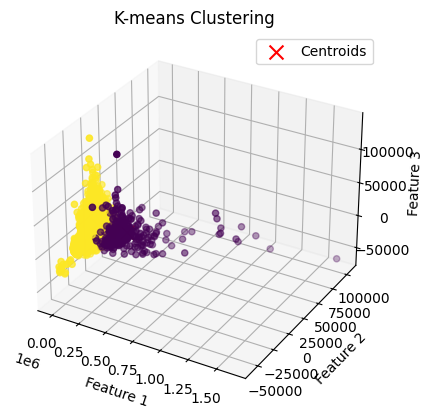

In [125]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_scaled is your DataFrame with three columns and you have already determined the number of clusters (n_clusters)

# Convert DataFrame to NumPy array
X_scaled_array = X_scaled.values

# Get cluster labels
labels = kmeans.labels_

# Calculate clustering evaluation metrics
silhouette = silhouette_score(X_scaled_array, labels)
calinski_harabasz = calinski_harabasz_score(X_scaled_array, labels)
davies_bouldin = davies_bouldin_score(X_scaled_array, labels)

print("Silhouette Score:", silhouette)
print("Calinski-Harabasz Score:", calinski_harabasz)
print("Davies-Bouldin Score:", davies_bouldin)

# (Optional) If your data is 2D or 3D, you can visualize the clustering
if X_scaled_array.shape[1] == 2:
    plt.scatter(X_scaled_array[:, 0], X_scaled_array[:, 1], c=labels, cmap='viridis')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=100, c='red', label='Centroids')
    plt.title('K-means Clustering')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()
elif X_scaled_array.shape[1] == 3:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_scaled_array[:, 0], X_scaled_array[:, 1], X_scaled_array[:, 2], c=labels, cmap='viridis')
    ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], marker='x', s=100, c='red', label='Centroids')
    ax.set_title('K-means Clustering')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.legend()
    plt.show()
